In [138]:
!pip install -q kaggle

In [139]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mmehmetaliyavuz","key":"44113e588a711c066db5a2fe430c5904"}'}

In [140]:
rm -rf /root/.kaggle

In [141]:
!mkdir ~/.kaggle

In [142]:
!cp kaggle.json ~/.kaggle

In [143]:
! chmod 600 ~/.kaggle/kaggle.json

In [144]:
!kaggle datasets download -d andrewmvd/car-plate-detection

car-plate-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [145]:
import zipfile

def unzip(path):
    with zipfile.ZipFile(path, 'r') as files:
        files.extractall()
path = "/content/car-plate-detection.zip"
unzip(path)

In [146]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

In [147]:
with open("/content/annotations/Cars105.xml","r") as files:
  data = files.read()
  print(data)


<annotation>
    <folder>images</folder>
    <filename>Cars105.png</filename>
    <size>
        <width>400</width>
        <height>240</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>152</xmin>
            <ymin>147</ymin>
            <xmax>206</xmax>
            <ymax>159</ymax>
        </bndbox>
    </object>
</annotation>


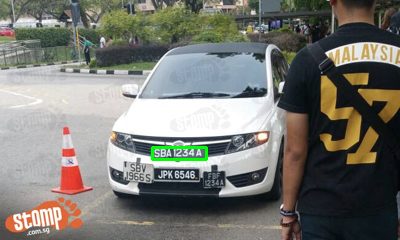

In [151]:
from google.colab.patches import cv2_imshow
import cv2
import xml.etree.ElementTree as ET

def get_value(root, *args):
    element = root
    for tag in args:
        element = element.find(tag)
        if element is None:
            return None
    return element.text

with open("/content/annotations/Cars105.xml", "r") as files:
    xml_data = files.read()

root = ET.fromstring(xml_data)

xmin = int(get_value(root, 'object', 'bndbox', 'xmin'))
ymin = int(get_value(root, 'object', 'bndbox', 'ymin'))
xmax = int(get_value(root, 'object', 'bndbox', 'xmax'))
ymax = int(get_value(root, 'object', 'bndbox', 'ymax'))

image = cv2.imread("/content/images/Cars105.png")

cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
cv2_imshow(image)

In [157]:
def create_data(annot,images):
  """
  for an example we need four point on data and image with rectangle
  annot: path of annotations,
  images: path of images
  """
  import pandas as pd
  import xml.etree.ElementTree as ET
  import os
  path_annot = []
  path_images = []
  data_list = []
  def gets_path(annot,images):
    for dirpath, dirnames, filenames in os.walk(annot):
      for filename in filenames:
        pathA = os.path.join(dirpath, filename)
        path_annot.append(pathA)
    for dirpath, dirnames, filenames in os.walk(images):
      for filename in filenames:
        pathI =  os.path.join(dirpath, filename)
        path_images.append(pathI)
      return path_annot,path_images

 #this get_value function gets element from json

  def get_value(root, *args):
    element = root
    for tag in args:
        element = element.find(tag)
        if element is None:
            return None
    return element.text
  path_annot, path_images = gets_path(annot=annot,images=images)

  jsons = []


  #these two for loop to exract features

  for path in path_annot:
    with open(path, "r") as files:
      xml_data = files.read()
      jsons.append(xml_data)

  for xml_data, filepath in zip(jsons, path_annot):

    root = ET.fromstring(xml_data)
    filename = str(get_value(root, 'filename'))
    xmin = int(get_value(root, 'object', 'bndbox', 'xmin'))
    ymin = int(get_value(root, 'object', 'bndbox', 'ymin'))
    xmax = int(get_value(root, 'object', 'bndbox', 'xmax'))
    ymax = int(get_value(root, 'object', 'bndbox', 'ymax'))
    data_dict = {
                "filepaths": filepath ,
                "filename": filename,
                "xmin": xmin,
                "ymin": ymin,
                "xmax": xmax,
                "ymax": ymax
            }
    data_list.append(data_dict)
  data = pd.DataFrame(data_list)
  return data

In [158]:
annot = "/content/annotations"
images = "/content/images"
data = create_data(annot,images)

In [160]:
data["imagepaths"] = data["filepaths"].str.replace("xml","png")

,filepaths,filename,xmin,ymin,xmax,ymax,imagepaths
0,/content/annotations/Cars227.xml,Cars227.png,118,199,153,211,/content/annotations/Cars227.png
1,/content/annotations/Cars211.xml,Cars211.png,28,64,387,235,/content/annotations/Cars211.png
2,/content/annotations/Cars349.xml,Cars349.png,38,225,146,249,/content/annotations/Cars349.png
3,/content/annotations/Cars259.xml,Cars259.png,324,166,475,205,/content/annotations/Cars259.png
4,/content/annotations/Cars175.xml,Cars175.png,295,237,456,367,/content/annotations/Cars175.png
...,...,...,...,...,...,...,...
428,/content/annotations/Cars272.xml,Cars272.png,170,81,316,121,/content/annotations/Cars272.png
429,/content/annotations/Cars28.xml,Cars28.png,541,366,598,384,/content/annotations/Cars28.png
430,/content/annotations/Cars157.xml,Cars157.png,330,152,366,179,/content/annotations/Cars157.png
431,/content/annotations/Cars47.xml,Cars47.png,6,143,48,161,/content/annotations/Cars47.png
